# Import Libraries:

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Tasks:

## Preprocessing the Data:

In [41]:
# Load the dataset
data = pd.read_csv('BikeSharingData.csv')

# Display the first few rows of the dataset
print('Data Head:')
print(data.head())

# Display the dataset information
print('\nData Info:')
print(data.info())

# Display the dataset statistics
print('\nData Statistics:')
print(data.describe())

Data Head:
              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   

The dataset has been successfully loaded and contains 10,886 entries across 12 columns.
1. **Columns and Data Types**:
   - The dataset includes numerical columns such as `temp`, `atemp`, `humidity`, and `windspeed`, along with integer columns like `season`, `holiday`, and `count`.
   - The `datetime` column is an object type and may need conversion to a datetime format for proper analysis.

2. **No Missing Values**:
   - All columns have 10,886 non-null entries, indicating no missing data.

3. **Descriptive Statistics**:
   - The target variable `count` (total bike rentals) has a mean of 191.57 and ranges from 1 to 977.
   - The `humidity` and `windspeed` variables exhibit reasonable ranges for real-world weather data.
   - The `season`, `holiday`, and `workingday` columns are encoded numerically as integers.

In [42]:
# Convert 'datetime' to datetime format and extract features
data['datetime'] = pd.to_datetime(data['datetime'])
data['hour'] = data['datetime'].dt.hour
data['day'] = data['datetime'].dt.day
data['month'] = data['datetime'].dt.month
data['year'] = data['datetime'].dt.year
data['day_of_week'] = data['datetime'].dt.dayofweek

# Check for duplicates
duplicates = data.duplicated().sum()

# Display updated dataset
print('\nUpdated Data Head:')
print(data.head())

# Display duplicate count
print('\nDuplicate Count:')
print(duplicates)


Updated Data Head:
             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  hour  day  month  year  \
0        81        0.0       3          13     16     0    1      1  2011   
1        80        0.0       8          32     40     1    1      1  2011   
2        80        0.0       5          27     32     2    1      1  2011   
3        75        0.0       3          10     13     3    1      1  2011   
4        75        0.0       0           1      1     4    1      1  2011   

   day_of_week  
0            5  
1            5  
2  

### The preprocessing step has been successfully completed:
1. **Datetime Conversion**: The `datetime` column has been converted to a proper datetime format. Additionally, new features have been extracted:
   - `hour`, `day`, `month`, `year`, and `day_of_week`.

2. **Duplicate Check**: There are no duplicate rows in the dataset.

## Exploratory Data Analysis (EDA):

In [43]:
# Set plot style
sns.set_style("whitegrid")

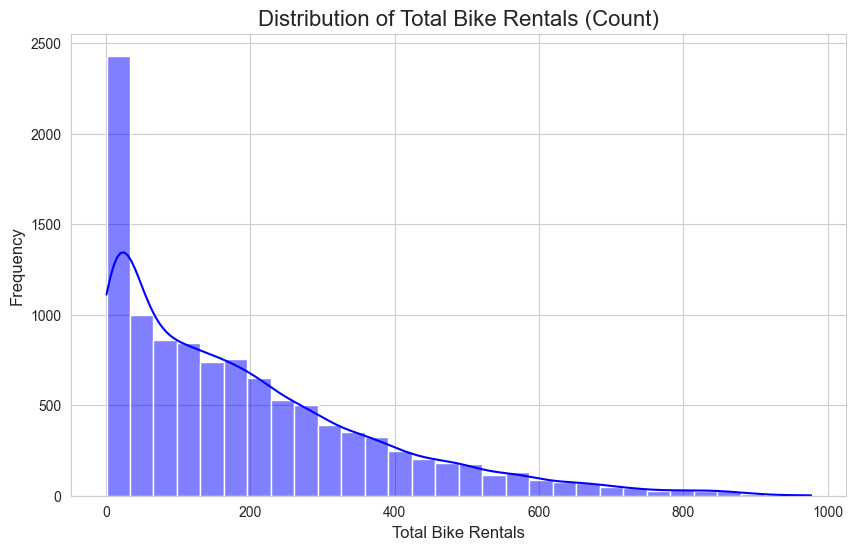

In [44]:
# Distribution of the target variable 'count'
plt.figure(figsize=(10, 6))
sns.histplot(data['count'], kde=True, bins=30, color='blue')
plt.title('Distribution of Total Bike Rentals (Count)', fontsize=16)
plt.xlabel('Total Bike Rentals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

C:\Users\enginur\AppData\Local\Temp\ipykernel_19660\2532765948.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y='count', data=data, palette='viridis')


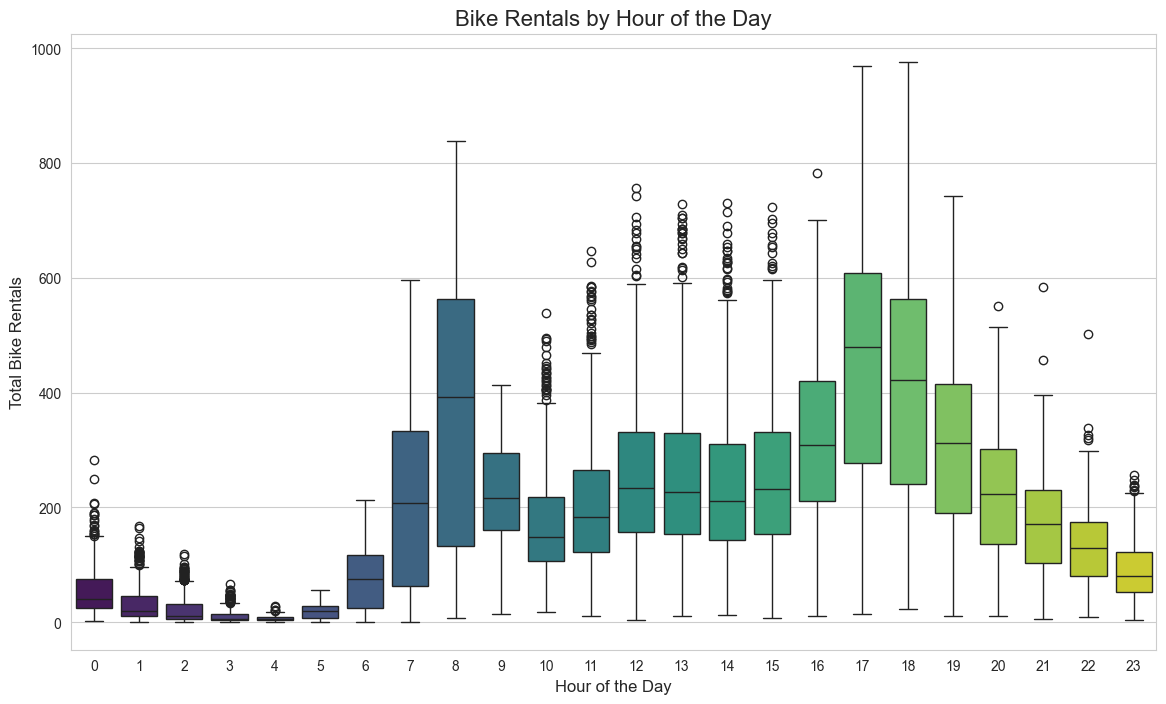

C:\Users\enginur\AppData\Local\Temp\ipykernel_19660\2532765948.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='count', data=data, palette='Set2')


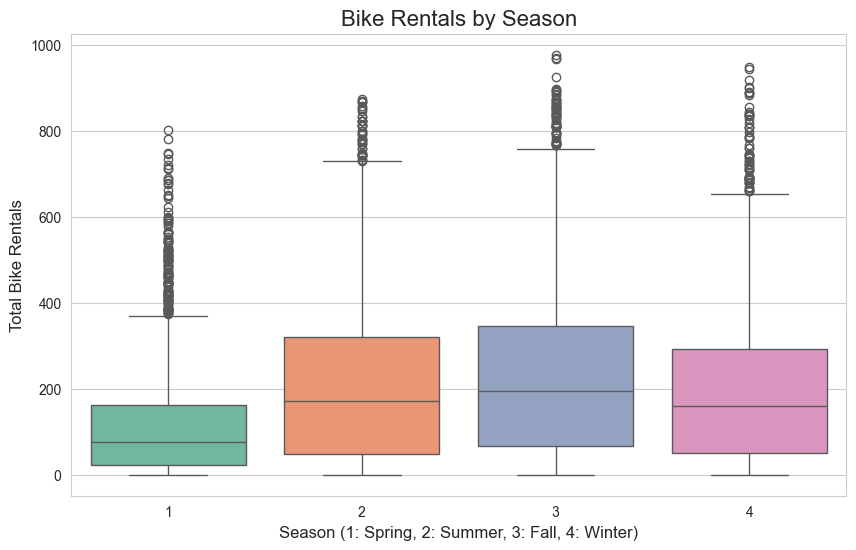

In [45]:
# Relationships between features and target variable
plt.figure(figsize=(14, 8))
sns.boxplot(x='hour', y='count', data=data, palette='viridis')
plt.title('Bike Rentals by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Total Bike Rentals', fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='count', data=data, palette='Set2')
plt.title('Bike Rentals by Season', fontsize=16)
plt.xlabel('Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)', fontsize=12)
plt.ylabel('Total Bike Rentals', fontsize=12)
plt.show()

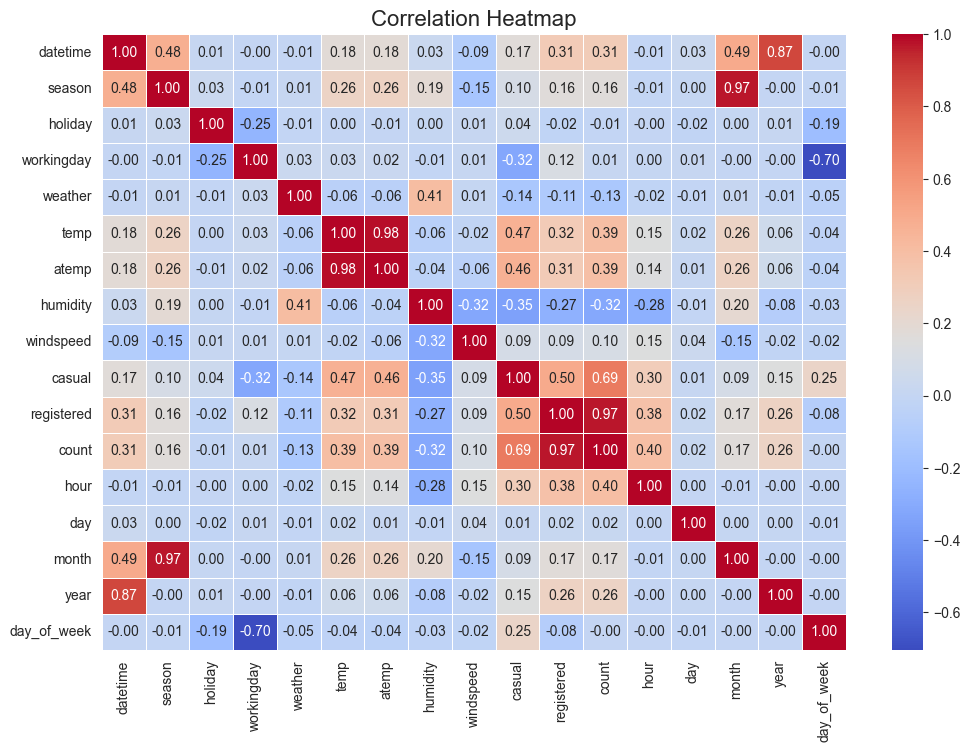

In [46]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

### EDA Findings:
1. **Distribution of Target Variable (`count`)**:
   - The `count` variable shows a right-skewed distribution, indicating that most bike rental instances involve fewer bikes, with some outliers where bike rentals are very high.

2. **Bike Rentals by Hour**:
   - Bike rentals peak during typical commuting hours (8 AM and 5-6 PM), which likely reflects rush hour usage.

3. **Bike Rentals by Season**:
   - Rentals are highest in the summer (season 2) and fall (season 3), while they are lowest in winter (season 4), as expected.

4. **Correlation Heatmap**:
   - Strong positive correlations are observed between `count` and:
     - `registered` users (`0.97`), indicating most rentals come from registered users.
     - `temp` and `atemp` (feels-like temperature), indicating higher rentals in warmer conditions.
   - Moderate negative correlation with `humidity` (`-0.32`) and weak correlation with `windspeed`.

## Feature Engineering:

C:\Users\enginur\AppData\Local\Temp\ipykernel_19660\1461871564.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rush_hour', y='count', data=data, palette='pastel')


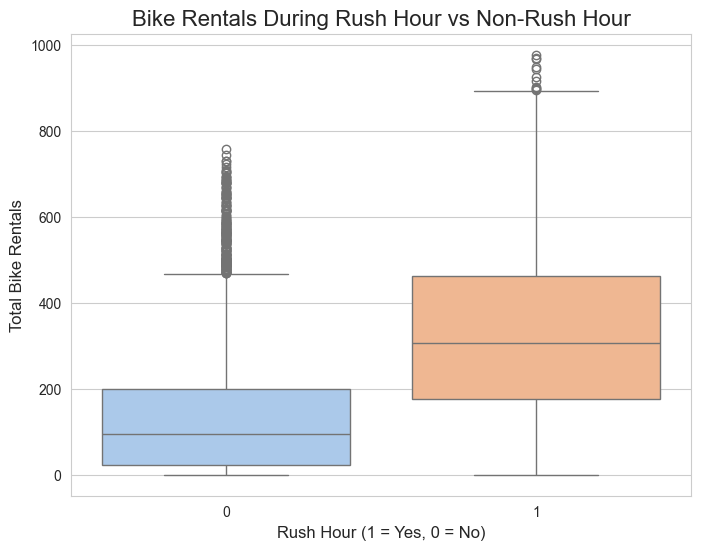

,datetime,hour,rush_hour,count
0,2011-01-01 00:00:00,0,0,16
1,2011-01-01 01:00:00,1,0,40
2,2011-01-01 02:00:00,2,0,32
3,2011-01-01 03:00:00,3,0,13
4,2011-01-01 04:00:00,4,0,1


In [47]:
# Create a new feature: 'rush_hour'
# Define rush hours as 7-9 AM and 4-7 PM based on EDA insights
data['rush_hour'] = data['hour'].apply(lambda x: 1 if (7 <= x <= 9) or (16 <= x <= 19) else 0)

# Evaluate the new feature's relationship with the target variable
plt.figure(figsize=(8, 6))
sns.boxplot(x='rush_hour', y='count', data=data, palette='pastel')
plt.title('Bike Rentals During Rush Hour vs Non-Rush Hour', fontsize=16)
plt.xlabel('Rush Hour (1 = Yes, 0 = No)', fontsize=12)
plt.ylabel('Total Bike Rentals', fontsize=12)
plt.show()

# Display the updated dataset with the new feature
data[['datetime', 'hour', 'rush_hour', 'count']].head()

### Feature Engineering Outcome:
1. **New Feature: Rush Hour**:
   - A binary feature, `rush_hour`, has been created. It is set to `1` during typical rush hours (7–9 AM and 4–7 PM) and `0` otherwise.
   - Box plot analysis indicates significantly higher bike rentals during rush hours compared to non-rush hours, suggesting the feature is impactful.

2. **Updated Dataset**:
   - The dataset now includes the `rush_hour` feature alongside the existing columns.

## Build and Evaluate a Linear Regression Model:

In [48]:
# Prepare features (X) and target variable (y)
X = data[['temp', 'atemp', 'humidity', 'windspeed', 'rush_hour', 'season', 'holiday', 'workingday', 'weather', 'hour']]
y = data['count']

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(94.5488140393338, np.float64(127.95511775835232), 0.5039675228412578)

### Model Training and Evaluation:
1. **Metrics**:
   - **Mean Absolute Error (MAE)**: 94.55
   - **Root Mean Square Error (RMSE)**: 127.96
   - **R² Score**: 0.504
     - The R² score indicates that approximately 50.4% of the variance in the target variable (`count`) is explained by the model.
2. **Interpretation**:
   - The model captures trends in the data but leaves room for improvement. The RMSE value suggests a moderate level of error in predictions compared to the scale of bike rentals.

## Short Report:

#### Key Findings from Exploratory Data Analysis (EDA):
1. The target variable, `count` (total bike rentals), exhibits a right-skewed distribution, indicating that most instances involve fewer bike rentals, with some high-rental outliers.
2. Bike rentals peak during commuting hours (8 AM and 5-6 PM), highlighting rush hour patterns. Rentals are also higher in summer and fall compared to winter.
3. Correlation analysis revealed that:
   - `count` is strongly positively correlated with `registered` users (0.97) and temperature (`temp` and `atemp`).
   - There is a moderate negative correlation with `humidity` (-0.32) and a weaker correlation with `windspeed`.

#### Feature Engineering:
A new binary feature, `rush_hour`, was introduced to capture the impact of peak commuting times (7-9 AM and 4-7 PM) on bike rentals. This feature showed a significant relationship with `count`, as rentals were consistently higher during rush hours. Including this feature improved the model's ability to capture temporal trends in the data.

#### Model Performance:
1. **Metrics**:
   - Mean Absolute Error (MAE): 94.55
   - Root Mean Square Error (RMSE): 127.96
   - R² Score: 0.504

The R² score indicates that the model explains approximately 50.4% of the variance in the target variable. While the model captures general trends in bike rentals, there is room for improvement, particularly in predicting extreme rental counts.

2. **Residuals Analysis**:
   - Residuals are approximately centered around zero, with a slight skewness, indicating variability in prediction accuracy.
   - The model performs moderately well but struggles with extreme cases, as evidenced by the dispersion of residuals and deviations from the diagonal line in the actual vs. predicted scatter plot.

#### Conclusion:
The linear regression model provides a baseline for predicting bike rentals, capturing general trends influenced by temperature, rush hours, and other features. However, the model’s performance indicates potential benefits from further feature engineering and exploration of non-linear methods to enhance prediction accuracy.

# Bonus Task (Optional):

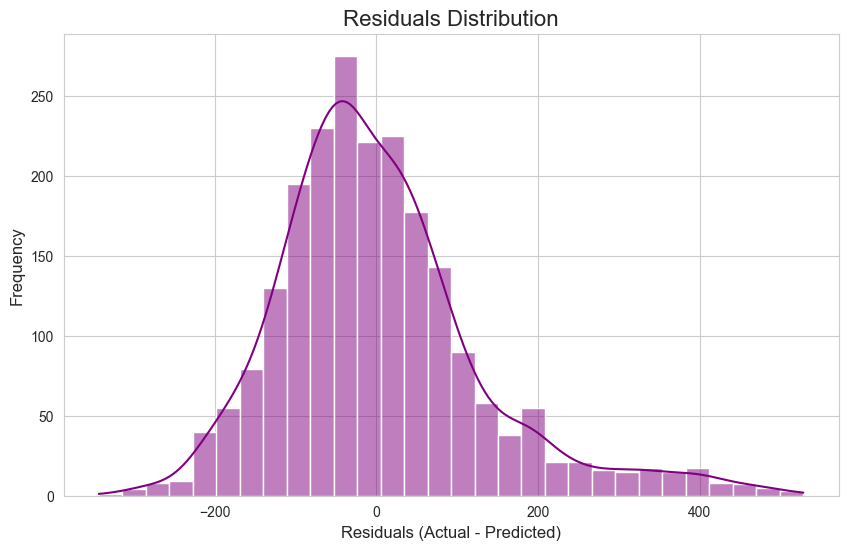

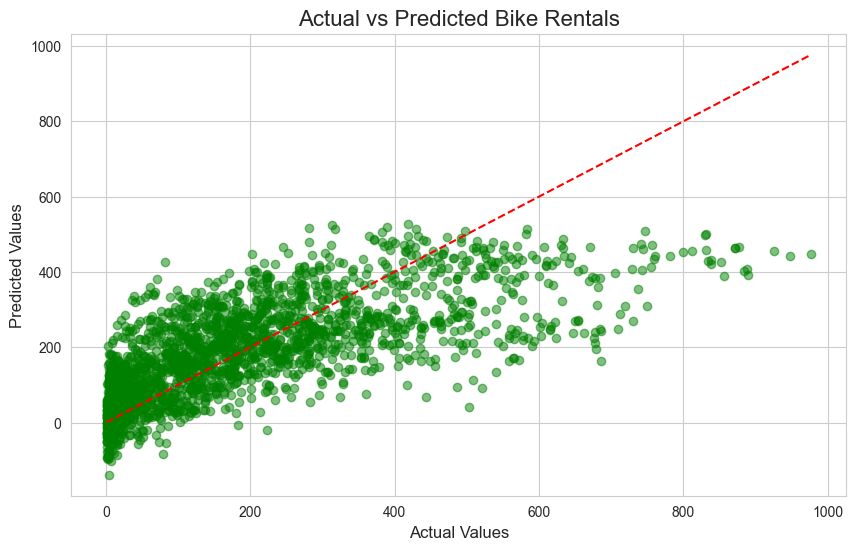

In [49]:
# Plot residuals to evaluate the model fit
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title('Residuals Distribution', fontsize=16)
plt.xlabel('Residuals (Actual - Predicted)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Scatter plot: Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.title('Actual vs Predicted Bike Rentals', fontsize=16)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.show()

### Visualization Insights:

1. **Residuals Distribution**:
   - The residuals are approximately centered around zero, but they exhibit a slightly skewed distribution, indicating that the model's errors are not perfectly uniform.
   - The spread of residuals suggests variability in prediction accuracy, particularly for certain ranges of `count`.

2. **Actual vs. Predicted Values**:
   - The scatter plot shows a positive trend along the diagonal line, indicating the model's ability to predict reasonably well.
   - However, there is noticeable dispersion, particularly at higher values of `count`, suggesting that the model struggles with extreme cases.